# Capstone Project - The Battle of the Neighborhoods (Week 2)
### Applied Data Science Capstone by IBM/Coursera


## Table of contents
* [Introduction: Business Problem](#introduction)
* [Data](#data)
* [Methodology](#methodology)
* [Analysis](#analysis)
* [Observations](#Observations)
* [Remarks](#Remarks)
* [Results and Discussion](#results)
* [Conclusion](#conclusion)


## Introduction: Business Problem <a name="introduction"></a>

Just like we are taught about how to use location data, I can think of a scenario where a person is moving from one place to another for a job change or some other reason. I have been living in Bangalore, but after completing this data science course, hypothetically, I get a job in a  metro city similar to Bangalore in terms of venues and population density etc, I could easily use Data Science to gather insights on the City without having to go to the location and check. The problem that Data Science can address is that we don't have to move an inch to gather insights. Data can be gathered with use of websites and tools and we can apply all of the techniques taught in Data Science course to sufficiently apply machine learning techniques.

**Problem Statement:-** I am moving from Bangalore to Mumbai because of a new job. I have been living in Bangalore in a certain area for last few years and I have been pretty comfortable to the neighborhood. I would like to find out if I can use the location data and check if I can find similar neighborhoods in Mumbai that could give me similar venues. How are the Mumbai locations placed in terms of availability of distinct venues compared to what we have in bangalore. Can I shortlist the good neighborhood fit within a large metro as Mumbai?

**Target Audience -** This scenario helps anyone who is looking to move to a new city that is similar to the present city they live in. Or anyone who want to get an idea of a new city they want to move to. To find out how similar or dissimilar the new city is compared to the present city they are residing currently.

## Data <a name="data"></a>

We will use foursquare data readily available to get data based on latitudes and longitudes as learnt in the tutorial earlier. 

To address the Business problem we would first need data of bangalore and mumbai locations. One way to gather data is based on zip codes. Since zip codes are unique and easily available from directly searching through google manually we can consider zip codes of bangalore and Mumbai. Looking at the websites we can see both Bangalore and Mumbai have data available from website. There are other websites where a csv file is available but it was not easy to gather it for our project so we can skip that option. Hence everytime we run the project from the notebook we need to connect to website and gather data. If the website is down or the information in the website changes then the results could change. 

Data will be in tabular format and will have columns like City, Pin Code or Postal Code, Area. This will not be in ready to use format. Data Cleaning is necessary since there are certain zip codes that won't fetch latitude or longitude values easily and can create errors during program execution. Once the Data clean up happens we can loop through and get coordinates and then we could proceed with using Foursquare.

Raw Data Extracted from the website could look like the sample data shown below:-


| Area | Postal Code |
| --- | --- | 
| Adugodi | 560 030 | 
| Agaram | 560 007 | 
| Air Force Stn. Yelahanka  | 560 063 | 
| Arabic College | 560 045 | 
| Banashankari | 560 050 | 



We will use the Postal Code to get the Latitude and Longitude Values

Let's start by importing Libraries and collecting Data necessary for Analysis

Import Libraries

In [7]:
import requests # library to handle requests
import pandas as pd # library for data analsysis
import numpy as np # library to handle data in a vectorized manner
import random # library for random number generation

#!conda install -c conda-forge geopy --yes 
from geopy.geocoders import Nominatim # module to convert an address into latitude and longitude values

# libraries for displaying images
from IPython.display import Image 
from IPython.core.display import HTML 
    
# tranforming json file into a pandas dataframe library
from pandas.io.json import json_normalize

!conda install -c conda-forge folium=0.5.0 --yes
import folium # plotting library

from sklearn.cluster import KMeans
import matplotlib.cm as cm
import matplotlib.colors as colors

print('Folium installed')
print('Libraries imported.')

Solving environment: done

## Package Plan ##

  environment location: /opt/conda/envs/Python36

  added / updated specs: 
    - folium=0.5.0


The following packages will be downloaded:

    package                    |            build
    ---------------------------|-----------------
    ca-certificates-2020.4.5.1 |       hecc5488_0         146 KB  conda-forge
    certifi-2020.4.5.1         |   py36h9f0ad1d_0         151 KB  conda-forge
    openssl-1.1.1g             |       h516909a_0         2.1 MB  conda-forge
    vincent-0.4.4              |             py_1          28 KB  conda-forge
    folium-0.5.0               |             py_0          45 KB  conda-forge
    branca-0.4.0               |             py_0          26 KB  conda-forge
    altair-4.1.0               |             py_1         614 KB  conda-forge
    python_abi-3.6             |          1_cp36m           4 KB  conda-forge
    ------------------------------------------------------------
                       

Read Zip Code Data from Website. Zip code can then be used to fetch Latitude and Longitude values.

In [4]:
bangalore_zip_code=pd.read_html('http://www.onlinebangalore.com/guide/pincodes/pincode.html')[0]

Clean up the dataset. Data read from websites are not directly processable. We need to check the raw data and clean them up(data and metadata)
Based on running the steps I could see some Zip codes are not fetching lat lng values even with multiple time re-running. We need to gather such zip codes and either manually update their values or skip those zip codes to be considered from the datasets. I am deleting such zip codes.

In [8]:
bangalore_zip_code.columns = bangalore_zip_code.columns.astype(str)
bangalore_zip_code.rename(columns = {'0':'area'}, inplace = True)
bangalore_zip_code.rename(columns = {'1':'zip_code'}, inplace = True)
bangalore_zip_code1=bangalore_zip_code
bangalore_zip_code1['zip_code']=bangalore_zip_code1['zip_code'].str.replace(' ','')
bangalore_zip_code2=bangalore_zip_code1
bangalore_zip_code2=bangalore_zip_code2[bangalore_zip_code2['zip_code'] != '560044']
bangalore_zip_code2=bangalore_zip_code2[bangalore_zip_code2['zip_code'] != '560011']
bangalore_zip_code2=bangalore_zip_code2[bangalore_zip_code2['zip_code'] != '560034']
print(bangalore_zip_code2.shape)

(94, 2)


Use the Nominatim in loop to get the Latitude and Longitude values. We need to run this step until all zip code data are gathered. Some times the job fails in between. 
So make sure the step completes successfully before proceeding.

In [38]:
for i in bangalore_zip_code2.index:
    geolocator = Nominatim(user_agent="foursquare_agent")
    geolocator
    location = geolocator.geocode(bangalore_zip_code2['zip_code'][i])
    bangalore_zip_code2.loc[i,'Latitude'] = location.latitude
    bangalore_zip_code2.loc[i,'Longitude'] = location.longitude
    #bangalore_zip_code2.ix[i,'Location'] = location
    #print(bangalore_zip_code2['zip_code'][i], " fine")
bangalore_zip_code2

,area,zip_code,Latitude,Longitude
0,Adugodi,560030,12.941853,77.602391
1,Agaram,560007,12.965130,77.629283
2,Air Force Stn. Yelahanka,560063,13.030679,77.613155
3,Arabic College,560045,13.020721,77.618797
4,Banashankari,560050,12.941995,77.553220
5,Banashankari 2nd Stage,560070,12.922968,77.564405
6,Banashankari 3rd Stage,560085,12.937930,77.541669
7,Bangalore City H.O.,560002,12.958625,77.577567
8,Bangalore G.P.O.,560001,-33.038136,137.575919
9,Bangalore University,560056,12.957204,77.496915


In [123]:
#bangalore_zip_code2.to_csv('bangalore_zip_code2.csv')

In [124]:
#print(bangalore_zip_code2['zip_code'].min())
#print(bangalore_zip_code2['zip_code'].max())

560001
560097


Drop the rows that have a blank value since this will later create error 

In [39]:
bangalore_zip_code3=bangalore_zip_code2.dropna()

In [40]:
bangalore_zip_code3.shape

(94, 4)

Check the data to see if it looks OK.

In [41]:
bangalore_zip_code3.head()

,area,zip_code,Latitude,Longitude
0,Adugodi,560030,12.941853,77.602391
1,Agaram,560007,12.965130,77.629283
2,Air Force Stn. Yelahanka,560063,13.030679,77.613155
3,Arabic College,560045,13.020721,77.618797
4,Banashankari,560050,12.941995,77.553220


This concludes the data gathering phase - we're now ready to use this data for analysis

## Methodology <a name="methodology"></a>

In this project we will start by doing Exploratory Data Analysis. Using the zip code data and the latitude longitude data of the zip code lets start plotting on the map.
Lets explore venues by connecting to foursquare api and check how densely populated are the venues. 
Do we have unique list of venues and how are the locations distributed across space

Gather all the venues list from each of the zip code and then proceed to cluster them using k means clustering unsupervised approach. We need to apply k means clustering to group the neighborhoods to check what kind of neighborhood I live in. Then we can apply similar clustering approach to Mumbai data. If we can find similarities then we have our results. K means clustering is the best approach to go forward from here.

In [12]:
# The code was removed by Watson Studio for sharing.


## Analysis <a name="analysis"></a>


Lets do some Exploratory Data Analysis
I'm starting with a value for lat & lng. This is the place I live. So lets explore the data

In [13]:
latitude=12.89256
longitude=77.60145
search_query = 'Italian'
radius = 5000
print(search_query + ' .... OK!')
url = 'https://api.foursquare.com/v2/venues/search?client_id={}&client_secret={}&ll={},{}&v={}&query={}&radius={}&limit={}'.format(CLIENT_ID, CLIENT_SECRET, latitude, longitude, VERSION, search_query, radius, LIMIT)
url
results = requests.get(url).json()
#results

Italian .... OK!


Get the data from Foursquare API and put it in a dataframe

In [14]:
# assign relevant part of JSON to venues
venues = results['response']['venues']

# tranform venues into a dataframe
from pandas.io.json import json_normalize
dataframe = json_normalize(venues)
dataframe

,categories,hasPerk,id,location.address,location.cc,location.city,location.country,location.crossStreet,location.distance,location.formattedAddress,location.labeledLatLngs,location.lat,location.lng,location.postalCode,location.state,name,referralId
0,"[{'id': '4bf58dd8d48988d124941735', 'name': 'O...",False,4e72e9e952b145ffbf564a99,"55, 2nd Floor, S V Complex",IN,Bangalore,India,Basavangudi,6320,"[55, 2nd Floor, S V Complex (Basavangudi), Ban...","[{'label': 'display', 'lat': 12.94367247221587...",12.943672,77.576088,560004,Karnātaka,Indo Italian Chambers,v-1587823423
1,"[{'id': '4bf58dd8d48988d1c9941735', 'name': 'I...",False,50866de9e4b0ebfe18396520,NaN,IN,NaN,India,NaN,1595,[India],"[{'label': 'display', 'lat': 12.90546782501129...",12.905468,77.595048,NaN,NaN,Gelato Italiano,v-1587823423
2,"[{'id': '4bf58dd8d48988d1c9941735', 'name': 'I...",False,4db9284dfa8c978590c910f4,"774, 16th main",IN,Bangalore,India,"7th cross, btm 2nd stage",2141,"[774, 16th main (7th cross, btm 2nd stage), Ba...","[{'label': 'display', 'lat': 12.90954407511085...",12.909544,77.610721,560076,Karnātaka,Gelato Italiano,v-1587823423
3,"[{'id': '4bf58dd8d48988d1c9941735', 'name': 'I...",False,4db8356d04376df9976f8453,BTM 2nd Stage,IN,Bangalore,India,"16th Main, 7th Cross",2561,"[BTM 2nd Stage (16th Main, 7th Cross), Bangalo...","[{'label': 'display', 'lat': 12.91405844066606...",12.914058,77.609854,560076,Karnātaka,Gelato Italiano,v-1587823423
4,"[{'id': '4bf58dd8d48988d1d0941735', 'name': 'D...",False,4f2a485de4b0d0775499a4ed,Koramangala 6th block,IN,Bangalore,India,NaN,4919,"[Koramangala 6th block, Bangalore, Karnātaka, ...","[{'label': 'display', 'lat': 12.93429690787570...",12.934297,77.616341,NaN,Karnātaka,Gelato Italiano,v-1587823423
5,"[{'id': '4bf58dd8d48988d1c9941735', 'name': 'I...",False,4d8f18a0ca75b60c37250da9,Jayanagar 7th Block,IN,Bangalore,India,NaN,4703,"[Jayanagar 7th Block, Bangalore, Karnātaka, In...","[{'label': 'display', 'lat': 12.92814276126891...",12.928143,77.578070,NaN,Karnātaka,Gelato Italiano,v-1587823423
6,"[{'id': '4bf58dd8d48988d1d0941735', 'name': 'D...",False,4ef5c5d22c5b0445ff75ecd2,NaN,IN,NaN,India,NaN,5492,[India],"[{'label': 'display', 'lat': 12.92679753731539...",12.926798,77.564995,NaN,NaN,GELATO ITALIANO,v-1587823423


Clean up the data and make it more readable

In [15]:
dataframe
# keep only columns that include venue name, and anything that is associated with location
filtered_columns = ['name', 'categories'] + [col for col in dataframe.columns if col.startswith('location.')] + ['id']
dataframe_filtered = dataframe.loc[:, filtered_columns]

# function that extracts the category of the venue
def get_category_type(row):
    try:
        categories_list = row['categories']
    except:
        categories_list = row['venue.categories']
        
    if len(categories_list) == 0:
        return None
    else:
        return categories_list[0]['name']

# filter the category for each row
dataframe_filtered['categories'] = dataframe_filtered.apply(get_category_type, axis=1)

# clean column names by keeping only last term
dataframe_filtered.columns = [column.split('.')[-1] for column in dataframe_filtered.columns]

dataframe_filtered

,name,categories,address,cc,city,country,crossStreet,distance,formattedAddress,labeledLatLngs,lat,lng,postalCode,state,id
0,Indo Italian Chambers,Office,"55, 2nd Floor, S V Complex",IN,Bangalore,India,Basavangudi,6320,"[55, 2nd Floor, S V Complex (Basavangudi), Ban...","[{'label': 'display', 'lat': 12.94367247221587...",12.943672,77.576088,560004,Karnātaka,4e72e9e952b145ffbf564a99
1,Gelato Italiano,Ice Cream Shop,NaN,IN,NaN,India,NaN,1595,[India],"[{'label': 'display', 'lat': 12.90546782501129...",12.905468,77.595048,NaN,NaN,50866de9e4b0ebfe18396520
2,Gelato Italiano,Ice Cream Shop,"774, 16th main",IN,Bangalore,India,"7th cross, btm 2nd stage",2141,"[774, 16th main (7th cross, btm 2nd stage), Ba...","[{'label': 'display', 'lat': 12.90954407511085...",12.909544,77.610721,560076,Karnātaka,4db9284dfa8c978590c910f4
3,Gelato Italiano,Ice Cream Shop,BTM 2nd Stage,IN,Bangalore,India,"16th Main, 7th Cross",2561,"[BTM 2nd Stage (16th Main, 7th Cross), Bangalo...","[{'label': 'display', 'lat': 12.91405844066606...",12.914058,77.609854,560076,Karnātaka,4db8356d04376df9976f8453
4,Gelato Italiano,Dessert Shop,Koramangala 6th block,IN,Bangalore,India,NaN,4919,"[Koramangala 6th block, Bangalore, Karnātaka, ...","[{'label': 'display', 'lat': 12.93429690787570...",12.934297,77.616341,NaN,Karnātaka,4f2a485de4b0d0775499a4ed
5,Gelato Italiano,Ice Cream Shop,Jayanagar 7th Block,IN,Bangalore,India,NaN,4703,"[Jayanagar 7th Block, Bangalore, Karnātaka, In...","[{'label': 'display', 'lat': 12.92814276126891...",12.928143,77.578070,NaN,Karnātaka,4d8f18a0ca75b60c37250da9
6,GELATO ITALIANO,Dessert Shop,NaN,IN,NaN,India,NaN,5492,[India],"[{'label': 'display', 'lat': 12.92679753731539...",12.926798,77.564995,NaN,NaN,4ef5c5d22c5b0445ff75ecd2


Using the latitude and longitude of venues lets show them in a map using folium

In [16]:
venues_map = folium.Map(location=[latitude, longitude], zoom_start=13) # generate map centred around the Conrad Hotel

# add a red circle marker to represent the Conrad Hotel
folium.features.CircleMarker(
    [latitude, longitude],
    radius=10,
    color='red',
    popup='Conrad Hotel',
    fill = True,
    fill_color = 'red',
    fill_opacity = 0.6
).add_to(venues_map)

# add the Italian restaurants as blue circle markers
for lat, lng, label in zip(dataframe_filtered.lat, dataframe_filtered.lng, dataframe_filtered.categories):
    folium.features.CircleMarker(
        [lat, lng],
        radius=5,
        color='blue',
        popup=label,
        fill = True,
        fill_color='blue',
        fill_opacity=0.6
    ).add_to(venues_map)

# display map
venues_map

Let's check out one particular Italian restaurant

In [17]:
venue_id = '4f2a485de4b0d0775499a4ed' # ID of Gelato Italiano
url = 'https://api.foursquare.com/v2/venues/{}?client_id={}&client_secret={}&v={}'.format(venue_id, CLIENT_ID, CLIENT_SECRET, VERSION)

In [18]:
result = requests.get(url).json()
print(result['response']['venue'].keys())
#result['response']['venue']

dict_keys(['id', 'name', 'contact', 'location', 'canonicalUrl', 'categories', 'verified', 'stats', 'price', 'likes', 'dislike', 'ok', 'allowMenuUrlEdit', 'beenHere', 'specials', 'photos', 'reasons', 'hereNow', 'createdAt', 'tips', 'shortUrl', 'timeZone', 'listed', 'seasonalHours', 'pageUpdates', 'inbox', 'attributes'])


In [19]:
try:
    print(result['response']['venue']['rating'])
except:
    print('This venue has not been rated yet.')

This venue has not been rated yet.


In [20]:
result['response']['venue']['tips']['count']

2

In [21]:
## Gelato Italiano Tips
limit = 15 # set limit to be greater than or equal to the total number of tips
url = 'https://api.foursquare.com/v2/venues/{}/tips?client_id={}&client_secret={}&v={}&limit={}'.format(venue_id, CLIENT_ID, CLIENT_SECRET, VERSION, limit)

results = requests.get(url).json()
results

{'meta': {'code': 200, 'requestId': '5ea443909fcb92001b0657fc'},
 'response': {'tips': {'count': 2,
   'items': [{'id': '4f2e5bd0e4b010c5f6c05360',
     'createdAt': 1328438224,
     'text': "The Dark Chocolate is pretty awesome, though a 'medium' will give you quite a sugar kick! The Choco-Walnut is also decent. Waffle cones are extra. MFT (two medium cones) Rs.150-250",
     'type': 'user',
     'canonicalUrl': 'https://foursquare.com/item/4f2e5bd0e4b010c5f6c05360',
     'lang': 'en',
     'likes': {'count': 0, 'groups': []},
     'logView': True,
     'agreeCount': 0,
     'disagreeCount': 0,
     'todo': {'count': 0},
     'user': {'id': '320944',
      'firstName': 'manu',
      'lastName': 'p',
      'photo': {'prefix': 'https://fastly.4sqi.net/img/user/',
       'suffix': '/Z2W02RKCB2XDDLOV.jpg'}}},
    {'id': '501d766ce4b03fc922990efa',
     'createdAt': 1344108140,
     'text': 'Fine Madagascar chocolate. Pretty good.',
     'type': 'user',
     'canonicalUrl': 'https://foursq

After some formatting we get the tips for the Italian restaurant. 

In [22]:
tips = results['response']['tips']['items']

tip = results['response']['tips']['items'][0]
tip['text']

"The Dark Chocolate is pretty awesome, though a 'medium' will give you quite a sugar kick! The Choco-Walnut is also decent. Waffle cones are extra. MFT (two medium cones) Rs.150-250"

lets explore more venues in the area

In [23]:
latitude=12.89256
longitude=77.60145

In [24]:
LIMIT = 5000
radius = 2000
VERSION = '20202304'
url = 'https://api.foursquare.com/v2/venues/explore?client_id={}&client_secret={}&ll={},{}&v={}&radius={}&limit={}'.format(CLIENT_ID, CLIENT_SECRET, latitude, longitude, VERSION, radius, LIMIT)

In [25]:
import requests
results = requests.get(url).json()
'There are {} around my home.'.format(len(results['response']['groups'][0]['items']))

'There are 100 around my home.'

In [26]:
results
items = results['response']['groups'][0]['items']
items[0]

{'reasons': {'count': 0,
  'items': [{'summary': 'This spot is popular',
    'type': 'general',
    'reasonName': 'globalInteractionReason'}]},
 'venue': {'id': '4f09811be4b0aa2dc772faee',
  'name': 'Decathlon Sports India Pvt Ltd',
  'location': {'address': '1st Flr, Raj Alkaa Park',
   'crossStreet': 'Bannerghatta Road',
   'lat': 12.887513041243446,
   'lng': 77.59771185000064,
   'labeledLatLngs': [{'label': 'display',
     'lat': 12.887513041243446,
     'lng': 77.59771185000064}],
   'distance': 692,
   'postalCode': '560076',
   'cc': 'IN',
   'city': 'Bangalore',
   'state': 'Kalena Agrahara, Karnataka',
   'country': 'India',
   'formattedAddress': ['1st Flr, Raj Alkaa Park (Bannerghatta Road)',
    'Bangalore 560076',
    'Kalena Agrahara, Karnataka',
    'India']},
  'categories': [{'id': '4bf58dd8d48988d1f2941735',
    'name': 'Sporting Goods Shop',
    'pluralName': 'Sporting Goods Shops',
    'shortName': 'Sporting Goods',
    'icon': {'prefix': 'https://ss3.4sqi.net/img/

In [27]:
dataframe = json_normalize(items) # flatten JSON

# filter columns
filtered_columns = ['venue.name', 'venue.categories'] + [col for col in dataframe.columns if col.startswith('venue.location.')] + ['venue.id']
dataframe_filtered = dataframe.loc[:, filtered_columns]

# filter the category for each row
dataframe_filtered['venue.categories'] = dataframe_filtered.apply(get_category_type, axis=1)

# clean columns
dataframe_filtered.columns = [col.split('.')[-1] for col in dataframe_filtered.columns]

dataframe_filtered.head(10)

,name,categories,address,cc,city,country,crossStreet,distance,formattedAddress,labeledLatLngs,lat,lng,neighborhood,postalCode,state,id
0,Decathlon Sports India Pvt Ltd,Sporting Goods Shop,"1st Flr, Raj Alkaa Park",IN,Bangalore,India,Bannerghatta Road,692,"[1st Flr, Raj Alkaa Park (Bannerghatta Road), ...","[{'label': 'display', 'lat': 12.88751304124344...",12.887513,77.597712,NaN,560076,"Kalena Agrahara, Karnataka",4f09811be4b0aa2dc772faee
1,Chavadi,BBQ Joint,NaN,IN,NaN,India,NaN,124,[India],"[{'label': 'display', 'lat': 12.89219938520235...",12.892199,77.602538,NaN,NaN,NaN,54e758f4498e6279040457a9
2,Natural Ice Cream,Ice Cream Shop,Panduranganagar,IN,Bangalore,India,Bannerghatta Rd,352,"[Panduranganagar (Bannerghatta Rd), Bangalore ...","[{'label': 'display', 'lat': 12.89218842311296...",12.892188,77.598222,NaN,560076,Karnātaka,4cbd71c2bac93704b3f2fd7c
3,The Yellow Submarine,Indian Restaurant,Above Big Bazaar,IN,Bengaluru South,India,NaN,595,"[Above Big Bazaar, Bengaluru South 560076, Kar...","[{'label': 'display', 'lat': 12.89762583991659...",12.897626,77.599696,NaN,560076,Karnātaka,5916db48ba4a647db940cbd9
4,Uru Brewpark,Brewery,NaN,IN,Bangalore,India,NaN,1449,"[Bangalore 560076, Karnātaka, India]","[{'label': 'display', 'lat': 12.905577, 'lng':...",12.905577,77.600966,NaN,560076,Karnātaka,5d29fa3abf5e0e002361cf2b
5,Ingu Tengu,South Indian Restaurant,NaN,IN,NaN,India,NaN,1225,[India],"[{'label': 'display', 'lat': 12.88326792286104...",12.883268,77.607514,NaN,NaN,NaN,5353524811d2b89866b37e84
6,Nagarjuna,Andhra Restaurant,Bannerghatta Road,IN,Bangalore,India,NaN,1367,"[Bannerghatta Road, Bangalore, Karnātaka, India]","[{'label': 'display', 'lat': 12.90484277056961...",12.904843,77.601733,NaN,NaN,Karnātaka,542ec87a498ea11026c3c8a6
7,Swensens,Ice Cream Shop,Royal Meenakshi Mall,IN,Bangalore,India,Bannerghatta Road,1944,"[Royal Meenakshi Mall (Bannerghatta Road), Ban...","[{'label': 'display', 'lat': 12.87607136752734...",12.876071,77.595542,NaN,NaN,Karnātaka,4d99c0db9079b1f798b7480a
8,Barbeque Nation,Mediterranean Restaurant,"#67,15th Crs, Nr Delmia",IN,Bangalore,India,"JP Nagar 3rd Phase,",1621,"[#67,15th Crs, Nr Delmia (JP Nagar 3rd Phase,)...","[{'label': 'display', 'lat': 12.90639576339989...",12.906396,77.596781,NaN,560034,Karnātaka,4bf3d5e3370e76b05972bd4a
9,Hakuna Matata,Lounge,"1231/35/2, 24th Main,Opposite Brigade Palm Spr...",IN,Bangalore,India,"Brigade Millenium Rd, JP Nagar 7th Phase",1629,"[1231/35/2, 24th Main,Opposite Brigade Palm Sp...","[{'label': 'display', 'lat': 12.89402844542930...",12.894028,77.586509,"JP Nagar, Bangalore, Karnātaka",560076,Karnātaka,548ef654498ec5db5ef6f1d5


In [28]:
dataframe_filtered.shape

(100, 16)

Lets plot the 100 venues near the area

In [31]:
venues_map = folium.Map(location=[latitude, longitude], zoom_start=15) # generate map centred around Ecco


# add Ecco as a red circle mark
folium.features.CircleMarker(
    [latitude, longitude],
    radius=10,
    popup='560076',
    fill=True,
    color='red',
    fill_color='red',
    fill_opacity=0.6
    ).add_to(venues_map)


# add popular spots to the map as blue circle markers
for lat, lng, label in zip(dataframe_filtered.lat, dataframe_filtered.lng, dataframe_filtered.categories):
    folium.features.CircleMarker(
        [lat, lng],
        radius=5,
        popup=label,
        fill=True,
        color='blue',
        fill_color='blue',
        fill_opacity=0.6
        ).add_to(venues_map)

# display map
venues_map

## Observations <a name="Observations"></a>
These are densely populated Areas. Even then, the venues list is less. 
I think this is because most people use android phone and since foursquare mainly collects data from iphone users the reviews and venue data is less.
We can see some major grouping hotspots around 3-4 places. Areas like arekere gate, jayadeva flyover and 24th main road JP Nagar.

Either that or there is a limit on how many venues we can query in a single call. Even though I have increased the radius and the limit I still get only 100 venues.

One more approach is to check data of Google places and see if we get more venues. More the data better the diversity of venues. I will leave that exercise to a later point in time

Lets filter the data set to few zip codes and start the clustering analysis

Considering few zip codes in South Bangalore

In [42]:
bangalore_zip_code3.columns
bangalore_south_data = bangalore_zip_code3[bangalore_zip_code3['zip_code'].isin (['560030','560007','560050','560070','560085','560083','560076','560004','560029','560069','560041','560078','560095','560068','560027'])].reset_index(drop=True)
bangalore_south_data.shape
bangalore_south_data.rename(columns = {'area':'Neighborhood'}, inplace = True)
bangalore_south_data

,Neighborhood,zip_code,Latitude,Longitude
0,Adugodi,560030,12.941853,77.602391
1,Agaram,560007,12.965130,77.629283
2,Banashankari,560050,12.941995,77.553220
3,Banashankari 2nd Stage,560070,12.922968,77.564405
4,Banashankari 3rd Stage,560085,12.937930,77.541669
5,Bannerghatta,560083,12.884159,77.581031
6,Bannerghatta Road,560076,12.892563,77.601455
7,Basavangudi,560004,12.938951,77.573982
8,Dharmaram College,560029,12.926182,77.597373
9,Jayanagar East,560069,12.917646,77.595484


Plot these zip codes on maps

In [43]:
# create map of New York using latitude and longitude values
map_bangalore = folium.Map(location=[latitude, longitude], zoom_start=12)

# add markers to map
for lat, lng, borough, neighborhood in zip(bangalore_south_data['Latitude'], bangalore_south_data['Longitude'], bangalore_south_data['Neighborhood'], bangalore_south_data['zip_code']):
    label = '{}, {}'.format(neighborhood, borough)
    label = folium.Popup(label, parse_html=True)
    folium.CircleMarker(
        [lat, lng],
        radius=5,
        popup=label,
        color='blue',
        fill=True,
        fill_color='#3186cc',
        fill_opacity=0.7,
        parse_html=False).add_to(map_bangalore)  
    
map_bangalore

Start getting nearby venues for each of the zip codes from foursquare data.

In [76]:
def getNearbyVenues(names, latitudes, longitudes, radius=3000):
    
    venues_list=[]
    for name, lat, lng in zip(names, latitudes, longitudes):
        print(name)
            
        # create the API request URL
        url = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}'.format(
            CLIENT_ID, 
            CLIENT_SECRET, 
            VERSION, 
            lat, 
            lng, 
            radius, 
            LIMIT)
            
        # make the GET request
        results = requests.get(url).json()["response"]['groups'][0]['items']
        
        # return only relevant information for each nearby venue
        venues_list.append([(
            name, 
            lat, 
            lng, 
            v['venue']['name'], 
            v['venue']['location']['lat'], 
            v['venue']['location']['lng'],  
            v['venue']['categories'][0]['name']) for v in results])

    nearby_venues = pd.DataFrame([item for venue_list in venues_list for item in venue_list])
    nearby_venues.columns = ['Neighborhood', 
                  'Neighborhood Latitude', 
                  'Neighborhood Longitude', 
                  'Venue', 
                  'Venue Latitude', 
                  'Venue Longitude', 
                  'Venue Category']
    
    return(nearby_venues)

In [77]:
bangalore_venues = getNearbyVenues(names=bangalore_south_data['Neighborhood'],
                                   latitudes=bangalore_south_data['Latitude'],
                                   longitudes=bangalore_south_data['Longitude']
                                  )

Adugodi
Agaram
Banashankari
Banashankari 2nd Stage
Banashankari 3rd Stage
Bannerghatta
Bannerghatta Road
Basavangudi
Dharmaram College
Jayanagar East
Jayanagar South
J P Nagar
Koramangala 6th Block
Madivala
Shanthinagar
Wilson Garden


In [78]:
#bangalore_venues.groupby('Neighborhood').count()
bangalore_venues.head()

,Neighborhood,Neighborhood Latitude,Neighborhood Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
0,Adugodi,12.941853,77.602391,Tommy Hilfiger,12.934552,77.611347,Clothing Store
1,Adugodi,12.941853,77.602391,PVR IMAX,12.934595,77.611321,Movie Theater
2,Adugodi,12.941853,77.602391,Truffles Ice & Spice,12.933443,77.614265,Burger Joint
3,Adugodi,12.941853,77.602391,Mango Tree,12.933639,77.610984,Indian Restaurant
4,Adugodi,12.941853,77.602391,PVR Cinemas,12.934389,77.611184,Multiplex


In [79]:
print('There are {} uniques categories.'.format(len(bangalore_venues['Venue Category'].unique())))

There are 134 uniques categories.


#### Lets do the one hot encoding - Convert categorical variable into column values

In [80]:
# one hot encoding
bangalore_onehot = pd.get_dummies(bangalore_venues[['Venue Category']], prefix="", prefix_sep="")

# add neighborhood column back to dataframe
bangalore_onehot['Neighborhood'] = bangalore_venues['Neighborhood'] 

# move neighborhood column to the first column
fixed_columns = [bangalore_onehot.columns[-1]] + list(bangalore_onehot.columns[:-1])
bangalore_onehot = bangalore_onehot[fixed_columns]

bangalore_onehot.head()

,Yoga Studio,Afghan Restaurant,American Restaurant,Andhra Restaurant,Arcade,Art Gallery,Asian Restaurant,Athletics & Sports,BBQ Joint,Bagel Shop,...,Szechuan Restaurant,Tea Room,Thai Restaurant,Theater,Toy / Game Store,Trail,Vegetarian / Vegan Restaurant,Vietnamese Restaurant,Wine Bar,Women's Store
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [81]:
bangalore_onehot.shape

(1545, 134)

In [82]:
bangalore_grouped = bangalore_onehot.groupby('Neighborhood').mean().reset_index()
bangalore_grouped

,Neighborhood,Yoga Studio,Afghan Restaurant,American Restaurant,Andhra Restaurant,Arcade,Art Gallery,Asian Restaurant,Athletics & Sports,BBQ Joint,...,Szechuan Restaurant,Tea Room,Thai Restaurant,Theater,Toy / Game Store,Trail,Vegetarian / Vegan Restaurant,Vietnamese Restaurant,Wine Bar,Women's Store
0,Adugodi,0.01,0.00,0.00,0.00,0.010000,0.000000,0.000000,0.01,0.00,...,0.000000,0.000000,0.00,0.01,0.01,0.00,0.010000,0.00,0.00,0.00
1,Agaram,0.00,0.00,0.00,0.01,0.010000,0.000000,0.030000,0.01,0.02,...,0.000000,0.030000,0.01,0.00,0.00,0.00,0.000000,0.01,0.00,0.00
2,Banashankari,0.00,0.00,0.00,0.00,0.011111,0.011111,0.022222,0.00,0.00,...,0.011111,0.011111,0.00,0.00,0.00,0.00,0.011111,0.00,0.00,0.00
3,Banashankari 2nd Stage,0.00,0.00,0.00,0.01,0.000000,0.000000,0.000000,0.00,0.00,...,0.010000,0.010000,0.00,0.00,0.00,0.00,0.000000,0.00,0.00,0.01
4,Banashankari 3rd Stage,0.00,0.00,0.00,0.00,0.018182,0.018182,0.018182,0.00,0.00,...,0.018182,0.018182,0.00,0.00,0.00,0.00,0.000000,0.00,0.00,0.00
5,Bannerghatta,0.00,0.00,0.01,0.00,0.000000,0.000000,0.000000,0.02,0.01,...,0.000000,0.000000,0.00,0.00,0.00,0.00,0.010000,0.00,0.00,0.00
6,Bannerghatta Road,0.00,0.00,0.01,0.01,0.000000,0.000000,0.000000,0.00,0.01,...,0.000000,0.010000,0.00,0.00,0.00,0.00,0.020000,0.00,0.00,0.00
7,Basavangudi,0.00,0.00,0.00,0.01,0.000000,0.000000,0.010000,0.00,0.00,...,0.010000,0.010000,0.00,0.01,0.00,0.00,0.000000,0.00,0.00,0.01
8,Dharmaram College,0.01,0.00,0.00,0.01,0.000000,0.000000,0.010000,0.00,0.00,...,0.000000,0.000000,0.00,0.00,0.00,0.00,0.000000,0.00,0.00,0.01
9,J P Nagar,0.00,0.00,0.00,0.00,0.000000,0.000000,0.000000,0.00,0.00,...,0.000000,0.010000,0.00,0.00,0.00,0.00,0.010000,0.00,0.00,0.01


In [83]:
bangalore_grouped.shape

(16, 134)

In [84]:
num_top_venues = 5

for hood in bangalore_grouped['Neighborhood']:
    print("----"+hood+"----")
    temp = bangalore_grouped[bangalore_grouped['Neighborhood'] == hood].T.reset_index()
    temp.columns = ['venue','freq']
    temp = temp.iloc[1:]
    temp['freq'] = temp['freq'].astype(float)
    temp = temp.round({'freq': 2})
    print(temp.sort_values('freq', ascending=False).reset_index(drop=True).head(num_top_venues))
    print('\n')

----Adugodi----
               venue  freq
0  Indian Restaurant  0.15
1               Café  0.05
2                Gym  0.04
3     Ice Cream Shop  0.04
4             Lounge  0.04


----Agaram----
               venue  freq
0               Café  0.07
1     Ice Cream Shop  0.06
2  Indian Restaurant  0.06
3                Pub  0.05
4              Hotel  0.05


----Banashankari----
                  venue  freq
0     Indian Restaurant  0.21
1  Fast Food Restaurant  0.11
2                  Café  0.07
3        Breakfast Spot  0.06
4        Ice Cream Shop  0.06


----Banashankari 2nd Stage----
                  venue  freq
0     Indian Restaurant  0.21
1        Ice Cream Shop  0.08
2  Fast Food Restaurant  0.05
3                  Café  0.05
4           Snack Place  0.04


----Banashankari 3rd Stage----
                  venue  freq
0                  Café  0.11
1           Pizza Place  0.11
2     Indian Restaurant  0.09
3  Fast Food Restaurant  0.07
4        Breakfast Spot  0.07


----Bannergh

In [85]:
def return_most_common_venues(row, num_top_venues):
    row_categories = row.iloc[1:]
    row_categories_sorted = row_categories.sort_values(ascending=False)
    
    return row_categories_sorted.index.values[0:num_top_venues]

In [86]:
num_top_venues = 10

indicators = ['st', 'nd', 'rd']

# create columns according to number of top venues
columns = ['Neighborhood']
for ind in np.arange(num_top_venues):
    try:
        columns.append('{}{} Most Common Venue'.format(ind+1, indicators[ind]))
    except:
        columns.append('{}th Most Common Venue'.format(ind+1))

# create a new dataframe
neighborhoods_venues_sorted = pd.DataFrame(columns=columns)
neighborhoods_venues_sorted['Neighborhood'] = bangalore_grouped['Neighborhood']

for ind in np.arange(bangalore_grouped.shape[0]):
    neighborhoods_venues_sorted.iloc[ind, 1:] = return_most_common_venues(bangalore_grouped.iloc[ind, :], num_top_venues)

neighborhoods_venues_sorted.head(16)

,Neighborhood,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,Adugodi,Indian Restaurant,Café,Lounge,Ice Cream Shop,Gym,Bakery,Dessert Shop,Hotel,Juice Bar,Multiplex
1,Agaram,Café,Ice Cream Shop,Indian Restaurant,Hotel,Pub,Restaurant,Burger Joint,Tea Room,Brewery,Asian Restaurant
2,Banashankari,Indian Restaurant,Fast Food Restaurant,Café,Breakfast Spot,Ice Cream Shop,Coffee Shop,Snack Place,Bakery,Sandwich Place,Pizza Place
3,Banashankari 2nd Stage,Indian Restaurant,Ice Cream Shop,Fast Food Restaurant,Café,Juice Bar,Chinese Restaurant,Snack Place,Breakfast Spot,South Indian Restaurant,Restaurant
4,Banashankari 3rd Stage,Café,Pizza Place,Indian Restaurant,Fast Food Restaurant,Breakfast Spot,Sandwich Place,Ice Cream Shop,Indian Chinese Restaurant,Snack Place,Coffee Shop
5,Bannerghatta,Indian Restaurant,Pizza Place,Café,Chinese Restaurant,Ice Cream Shop,South Indian Restaurant,Fast Food Restaurant,Breakfast Spot,Bakery,Italian Restaurant
6,Bannerghatta Road,Indian Restaurant,Ice Cream Shop,Café,Chinese Restaurant,Coffee Shop,Brewery,Multiplex,Fast Food Restaurant,Sandwich Place,Bakery
7,Basavangudi,Indian Restaurant,Ice Cream Shop,Fast Food Restaurant,Park,Restaurant,Sandwich Place,Juice Bar,Bakery,Pizza Place,Coffee Shop
8,Dharmaram College,Indian Restaurant,Ice Cream Shop,Café,Chinese Restaurant,Bakery,Coffee Shop,Lounge,Juice Bar,Restaurant,Multiplex
9,J P Nagar,Indian Restaurant,Ice Cream Shop,Fast Food Restaurant,Café,Coffee Shop,Pizza Place,South Indian Restaurant,Chinese Restaurant,Bakery,Brewery


In [159]:
#neighborhoods_venues_sorted.to_csv('bangalore_analyzed.csv')

We have the final dataset with top 10 most common venues in each neighborhood. Lets start the k means clustering analysis and fit the model

I am trying to find out the optimum K value rather than assuming it to be 5 or 6 or 7

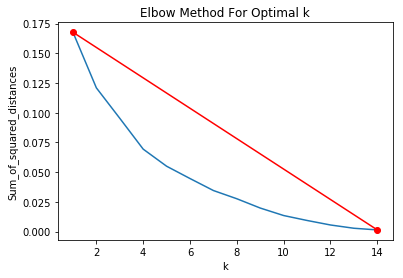

In [87]:
Sum_of_squared_distances = []
bangalore_grouped_clustering = bangalore_grouped.drop('Neighborhood', 1)
K = range(1,15)
for k in K:
    km = KMeans(n_clusters=k)
    km = km.fit(bangalore_grouped_clustering)
    Sum_of_squared_distances.append(km.inertia_)

x=[1,2,3,4,5,6,7,8,9,10,11,12,13,14]
import matplotlib.pyplot as plt
plt.plot(x, Sum_of_squared_distances)
plt.plot([K[0], K[13]],[Sum_of_squared_distances[0],Sum_of_squared_distances[13]],'ro-')
plt.xlabel('k')
plt.ylabel('Sum_of_squared_distances')
plt.title('Elbow Method For Optimal k')
plt.show()
plt.show()

From the above plot(elbow method to determine optimum K) sometimes it is not clear, although it looks like K is 5. Lets confirm using a function

### Looks like the optimum k value is 5

#### Let's confirm using a function

In [88]:
def calc_distance(x1,y1,a,b,c):
    d = abs((a * x1 + b * y1 + c)) / (math.sqrt(a * a + b * b))
    return d

In [89]:
a = Sum_of_squared_distances[0] - Sum_of_squared_distances[13]
b = K[13] - K[0]
c1 = K[0] * Sum_of_squared_distances[13]
c2 = K[13] * Sum_of_squared_distances[0]
c = c1 - c2

In [90]:
import math
distance_of_points_from_line = []
for k in range(14):
    distance_of_points_from_line.append(
        calc_distance(K[k],Sum_of_squared_distances[k],a,b,c))

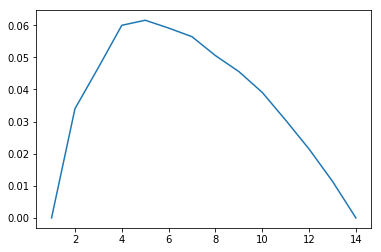

In [91]:
distance_of_points_from_line
plt.plot(K,distance_of_points_from_line)

### Thats settled. k = 5

Fit the model again using K = 5 this time.

In [92]:
from sklearn.cluster import KMeans
# set number of clusters
kclusters = 5

bangalore_grouped_clustering = bangalore_grouped.drop('Neighborhood', 1)

# run k-means clustering
kmeans = KMeans(n_clusters=kclusters, random_state=0).fit(bangalore_grouped_clustering)

# check cluster labels generated for each row in the dataframe
kmeans.labels_[0:10] 

array([1, 3, 4, 4, 2, 0, 1, 4, 1, 4], dtype=int32)

In [93]:
# add clustering labels
neighborhoods_venues_sorted.insert(0, 'Cluster Labels', kmeans.labels_)

bangalore_merged = bangalore_south_data

# merge toronto_grouped with toronto_data to add latitude/longitude for each neighborhood
bangalore_merged = bangalore_merged.join(neighborhoods_venues_sorted.set_index('Neighborhood'), on='Neighborhood')

bangalore_merged.head() # check the last columns!

,Neighborhood,zip_code,Latitude,Longitude,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,Adugodi,560030,12.941853,77.602391,1,Indian Restaurant,Café,Lounge,Ice Cream Shop,Gym,Bakery,Dessert Shop,Hotel,Juice Bar,Multiplex
1,Agaram,560007,12.965130,77.629283,3,Café,Ice Cream Shop,Indian Restaurant,Hotel,Pub,Restaurant,Burger Joint,Tea Room,Brewery,Asian Restaurant
2,Banashankari,560050,12.941995,77.553220,4,Indian Restaurant,Fast Food Restaurant,Café,Breakfast Spot,Ice Cream Shop,Coffee Shop,Snack Place,Bakery,Sandwich Place,Pizza Place
3,Banashankari 2nd Stage,560070,12.922968,77.564405,4,Indian Restaurant,Ice Cream Shop,Fast Food Restaurant,Café,Juice Bar,Chinese Restaurant,Snack Place,Breakfast Spot,South Indian Restaurant,Restaurant
4,Banashankari 3rd Stage,560085,12.937930,77.541669,2,Café,Pizza Place,Indian Restaurant,Fast Food Restaurant,Breakfast Spot,Sandwich Place,Ice Cream Shop,Indian Chinese Restaurant,Snack Place,Coffee Shop


In [94]:
bangalore_merged=bangalore_merged.dropna()
bangalore_merged['Cluster Labels']=bangalore_merged['Cluster Labels'].astype(int)

In [95]:
# create map
map_clusters = folium.Map(location=[latitude, longitude], zoom_start=11)

# set color scheme for the clusters
x = np.arange(kclusters)
ys = [i + x + (i*x)**2 for i in range(kclusters)]
colors_array = cm.rainbow(np.linspace(0, 1, len(ys)))
rainbow = [colors.rgb2hex(i) for i in colors_array]

# add markers to the map
markers_colors = []
for lat, lon, poi, cluster in zip(bangalore_merged['Latitude'], bangalore_merged['Longitude'], bangalore_merged['Neighborhood'], bangalore_merged['Cluster Labels']):
    label = folium.Popup(str(poi) + ' Cluster ' + str(cluster), parse_html=True)
    folium.CircleMarker(
        [lat, lon],
        radius=5,
        popup=label,
        color=rainbow[cluster-1],
        fill=True,
        fill_color=rainbow[cluster-1],
        fill_opacity=0.7).add_to(map_clusters)
       
map_clusters

In [96]:
bangalore_merged.head(20)

,Neighborhood,zip_code,Latitude,Longitude,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,Adugodi,560030,12.941853,77.602391,1,Indian Restaurant,Café,Lounge,Ice Cream Shop,Gym,Bakery,Dessert Shop,Hotel,Juice Bar,Multiplex
1,Agaram,560007,12.965130,77.629283,3,Café,Ice Cream Shop,Indian Restaurant,Hotel,Pub,Restaurant,Burger Joint,Tea Room,Brewery,Asian Restaurant
2,Banashankari,560050,12.941995,77.553220,4,Indian Restaurant,Fast Food Restaurant,Café,Breakfast Spot,Ice Cream Shop,Coffee Shop,Snack Place,Bakery,Sandwich Place,Pizza Place
3,Banashankari 2nd Stage,560070,12.922968,77.564405,4,Indian Restaurant,Ice Cream Shop,Fast Food Restaurant,Café,Juice Bar,Chinese Restaurant,Snack Place,Breakfast Spot,South Indian Restaurant,Restaurant
4,Banashankari 3rd Stage,560085,12.937930,77.541669,2,Café,Pizza Place,Indian Restaurant,Fast Food Restaurant,Breakfast Spot,Sandwich Place,Ice Cream Shop,Indian Chinese Restaurant,Snack Place,Coffee Shop
5,Bannerghatta,560083,12.884159,77.581031,0,Indian Restaurant,Pizza Place,Café,Chinese Restaurant,Ice Cream Shop,South Indian Restaurant,Fast Food Restaurant,Breakfast Spot,Bakery,Italian Restaurant
6,Bannerghatta Road,560076,12.892563,77.601455,1,Indian Restaurant,Ice Cream Shop,Café,Chinese Restaurant,Coffee Shop,Brewery,Multiplex,Fast Food Restaurant,Sandwich Place,Bakery
7,Basavangudi,560004,12.938951,77.573982,4,Indian Restaurant,Ice Cream Shop,Fast Food Restaurant,Park,Restaurant,Sandwich Place,Juice Bar,Bakery,Pizza Place,Coffee Shop
8,Dharmaram College,560029,12.926182,77.597373,1,Indian Restaurant,Ice Cream Shop,Café,Chinese Restaurant,Bakery,Coffee Shop,Lounge,Juice Bar,Restaurant,Multiplex
9,Jayanagar East,560069,12.917646,77.595484,1,Indian Restaurant,Ice Cream Shop,Coffee Shop,Chinese Restaurant,Bakery,Brewery,Café,Gym,Lounge,Juice Bar


#### Let's explore each neighborhood. I stay in cluster 1. 

##### Observations:- 
Most of the data are restaurants/Cafe. Although this is true globally I fell we should have more data to have a diversity.
Nonetheless lets go with what we have.

It seems like I stay in a cluster that is very common. I agree with this. I am surrounded with places that are very common. 
Thank you Data Science for telling me what I already know!!!

In [98]:
#bangalore_merged.loc[bangalore_merged['Cluster Labels'] == 0, bangalore_merged.columns[[1] + list(range(5, bangalore_merged.shape[1]))]]
bangalore_merged.loc[bangalore_merged['Cluster Labels'] == 1, bangalore_merged.columns[[0] + list(range(5, bangalore_merged.shape[1]))]]
#bangalore_merged.loc[bangalore_merged['Cluster Labels'] == 2, bangalore_merged.columns[[0] + list(range(5, bangalore_merged.shape[1]))]]
#bangalore_merged.loc[bangalore_merged['Cluster Labels'] == 3, bangalore_merged.columns[[1] + list(range(5, bangalore_merged.shape[1]))]]
#bangalore_merged.loc[bangalore_merged['Cluster Labels'] == 4, bangalore_merged.columns[[1] + list(range(5, bangalore_merged.shape[1]))]]

,Neighborhood,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,Adugodi,Indian Restaurant,Café,Lounge,Ice Cream Shop,Gym,Bakery,Dessert Shop,Hotel,Juice Bar,Multiplex
6,Bannerghatta Road,Indian Restaurant,Ice Cream Shop,Café,Chinese Restaurant,Coffee Shop,Brewery,Multiplex,Fast Food Restaurant,Sandwich Place,Bakery
8,Dharmaram College,Indian Restaurant,Ice Cream Shop,Café,Chinese Restaurant,Bakery,Coffee Shop,Lounge,Juice Bar,Restaurant,Multiplex
9,Jayanagar East,Indian Restaurant,Ice Cream Shop,Coffee Shop,Chinese Restaurant,Bakery,Brewery,Café,Gym,Lounge,Juice Bar
10,Jayanagar South,Indian Restaurant,Ice Cream Shop,Café,Chinese Restaurant,Coffee Shop,Brewery,Pizza Place,Fast Food Restaurant,Multiplex,Restaurant


#### Lets do Similar exercise with Mumbai and check if we can find anything interesting.

In [99]:
mumbai_zip_code=pd.read_html('https://mumbai7.com/postal-codes-in-mumbai/')[0]
mumbai_zip_code1=mumbai_zip_code
mumbai_zip_code1
mumbai_zip_code1.rename(columns = {'Post Office':'area'}, inplace = True)
mumbai_zip_code1.rename(columns = {'Pin Code':'zip_code'}, inplace = True)
mumbai_zip_code2=mumbai_zip_code1
mumbai_zip_code2
mumbai_zip_code3=mumbai_zip_code2.drop_duplicates(subset='zip_code', keep="last")
mumbai_zip_code3

,City,area,zip_code
0,Mumbai,August Kranti Marg,400036
1,Mumbai,Aarey Milk Colony,400065
2,Mumbai,Andheri (East),400069
3,Mumbai,Andheri (West),400058
4,Mumbai,Antop Hill,400037
5,Mumbai,Anu Shakti Nagar,400094
6,Mumbai,B A R C,400085
7,Mumbai,Ballard Estate,400038
8,Mumbai,Bandra (East),400051
9,Mumbai,Bandra (West),400050


#### Lets create a subset of data points

In [100]:
thane_navi_mumbai=mumbai_zip_code3[mumbai_zip_code3['City']!='Mumbai']
thane_navi_mumbai=thane_navi_mumbai[thane_navi_mumbai['zip_code'] != 400611]
thane_navi_mumbai=thane_navi_mumbai[thane_navi_mumbai['zip_code'] != 400707]
thane_navi_mumbai=thane_navi_mumbai[thane_navi_mumbai['zip_code'] != 401304]
thane_navi_mumbai=thane_navi_mumbai[thane_navi_mumbai['zip_code'] != 401210]

thane_navi_mumbai

,City,area,zip_code
94,Navi Mumbai,Airoli Mode,400708
96,Navi Mumbai,Ghansoli,400701
98,Navi Mumbai,Konkan Bhawan,400614
99,Navi Mumbai,Krishi Utpanna Bazar,400705
100,Navi Mumbai,Mumbra,400612
101,Navi Mumbai,N A D Karanja,400704
102,Navi Mumbai,Nerul Mode,400706
103,Navi Mumbai,Turbhe,400613
104,Navi Mumbai,Uran,400702
105,Navi Mumbai,Vashi,400703


In [68]:
for i in thane_navi_mumbai.index:
    geolocator = Nominatim(user_agent="foursquare_agent")
    geolocator
    location = geolocator.geocode(thane_navi_mumbai['zip_code'][i])
    thane_navi_mumbai.loc[i,'Latitude'] = location.latitude
    thane_navi_mumbai.loc[i,'Longitude'] = location.longitude
    #bangalore_zip_code2.ix[i,'Location'] = location
    print(thane_navi_mumbai['zip_code'][i], " fine")
thane_navi_mumbai

400708  fine
400701  fine
400614  fine
400705  fine
400612  fine
400704  fine
400706  fine
400613  fine
400702  fine
400703  fine
401301  fine
401302  fine
400608  fine
401201  fine
401202  fine
401101  fine
401105  fine
401501  fine
401701  fine
401503  fine
401601  fine
401602  fine
401610  fine
401206  fine
401702  fine
400606  fine
401603  fine
400605  fine
401607  fine
401401  fine
401402  fine
401703  fine
401403  fine
401104  fine
401107  fine
401604  fine
401209  fine
400602  fine
401404  fine
401207  fine
400607  fine
401405  fine
401203  fine
401609  fine
401606  fine
401502  fine
401504  fine
401506  fine
400603  fine
400601  fine
401102  fine
401106  fine
401204  fine
401103  fine
401208  fine
401605  fine
401303  fine
400604  fine


,City,area,zip_code,Latitude,Longitude
94,Navi Mumbai,Airoli Mode,400708,19.176243,73.003531
96,Navi Mumbai,Ghansoli,400701,19.131424,73.000537
98,Navi Mumbai,Konkan Bhawan,400614,46.780601,23.612298
99,Navi Mumbai,Krishi Utpanna Bazar,400705,19.080266,73.021173
100,Navi Mumbai,Mumbra,400612,46.779054,23.616420
101,Navi Mumbai,N A D Karanja,400704,29.846600,106.472145
102,Navi Mumbai,Nerul Mode,400706,19.012233,73.015246
103,Navi Mumbai,Turbhe,400613,46.781382,23.608964
104,Navi Mumbai,Uran,400702,18.882280,72.949381
105,Navi Mumbai,Vashi,400703,19.082812,72.996086


In [174]:
#mumbai_zip_code3
#mumbai=mumbai_zip_code3[mumbai_zip_code3['City']=='Mumbai']

In [175]:
#thane_navi_mumbai.to_csv('thane_navi_mumbai.csv')

In [176]:
#mumbai_clean=mumbai.dropna()
#mumbai_clean.shape
#mumbai_clean.to_csv('mumbai_clean.csv')

In [69]:
thane_navi_mumbai.columns

Index(['City', 'area', 'zip_code', 'Latitude', 'Longitude'], dtype='object')

In [70]:
# create map of Mumbai using latitude and longitude values

latitude=19.0330
longitude=73.0297

map_mumbai = folium.Map(location=[latitude, longitude], zoom_start=8)

# add markers to map
for lat, lng, borough, neighborhood in zip(thane_navi_mumbai['Latitude'], thane_navi_mumbai['Longitude'], thane_navi_mumbai['area'], thane_navi_mumbai['zip_code']):
    label = '{}, {}'.format(neighborhood, borough)
    label = folium.Popup(label, parse_html=True)
    folium.CircleMarker(
        [lat, lng],
        radius=5,
        popup=label,
        color='blue',
        fill=True,
        fill_color='#3186cc',
        fill_opacity=0.7,
        parse_html=False).add_to(map_mumbai)  
    
map_mumbai

In [71]:
thane_navi_mumbai.columns
thane_navi_mumbai_data=thane_navi_mumbai

thane_navi_mumbai_data.rename(columns = {'area':'Neighborhood'}, inplace = True)

In [101]:

mumbai_venues = getNearbyVenues(names=thane_navi_mumbai_data['Neighborhood'],
                                   latitudes=thane_navi_mumbai_data['Latitude'],
                                   longitudes=thane_navi_mumbai_data['Longitude']
                                  )

Airoli Mode
Ghansoli
Konkan Bhawan
Krishi Utpanna Bazar
Mumbra
N A D Karanja
Nerul Mode
Turbhe
Uran
Vashi
Agashi
Arnala
Balcum
Bassien
Bassien Road
Bhayandar
Bhayander (East)
Boisar
Bordi
Chinchani
Dahanu
Dahanu Road
Dapcheri
Ganeshpuri
Gholvad
Jakegram
Jawhar
Kalwa
Kasa
Kelwa
Kelwa Mahim
Kosbad Hill
Manor
Mira
Mira Road
Mokhada
Nalasopara (East)
Naupada
Palghar H O
Papdi
Sandoz Baug
Satpati
Sopara
Suryanagar
Talasari
Tarapur
Tarapur App
Tarapur J/A
Thane (East)
Thane (H Q)
Umbarpada
Uttan
Vajreshwari
Vangam
Vasai East I/E
Vikramgad
Virar
Wagle Industrial Estate


In [102]:
#mumbai_venues.groupby('Neighborhood').count()
bangalore_venues.columns
mumbai_venues.columns

Index(['Neighborhood', 'Neighborhood Latitude', 'Neighborhood Longitude',
       'Venue', 'Venue Latitude', 'Venue Longitude', 'Venue Category'],
      dtype='object')

In [103]:
print('There are {} uniques categories.'.format(len(mumbai_venues['Venue Category'].unique())))

There are 160 uniques categories.


In [104]:
# one hot encoding
mumbai_onehot = pd.get_dummies(mumbai_venues[['Venue Category']], prefix="", prefix_sep="")

# add neighborhood column back to dataframe
mumbai_onehot['Neighborhood'] = mumbai_venues['Neighborhood'] 

# move neighborhood column to the first column
fixed_columns = [mumbai_onehot.columns[-1]] + list(mumbai_onehot.columns[:-1])
mumbai_onehot = mumbai_onehot[fixed_columns]

mumbai_onehot.head()

,Neighborhood,ATM,Airport,Airport Lounge,Airport Terminal,American Restaurant,Art Gallery,Asian Restaurant,Athletics & Sports,Auto Garage,...,Toll Plaza,Toy / Game Store,Trail,Train Station,Tram Station,Turkish Restaurant,Vegetarian / Vegan Restaurant,Water Park,Whisky Bar,Wine Bar
0,Airoli Mode,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,Airoli Mode,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,Airoli Mode,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,Airoli Mode,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,Airoli Mode,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [105]:
mumbai_onehot.shape

(1915, 161)

In [106]:
mumbai_grouped = mumbai_onehot.groupby('Neighborhood').mean().reset_index()
mumbai_grouped

,Neighborhood,ATM,Airport,Airport Lounge,Airport Terminal,American Restaurant,Art Gallery,Asian Restaurant,Athletics & Sports,Auto Garage,...,Toll Plaza,Toy / Game Store,Trail,Train Station,Tram Station,Turkish Restaurant,Vegetarian / Vegan Restaurant,Water Park,Whisky Bar,Wine Bar
0,Agashi,0.000000,0.000000,0.000000,0.000000,0.000000,0.00,0.000000,0.000000,0.000000,...,0.00,0.000000,0.00,0.000000,0.000000,0.000000,0.000000,0.000000,0.00,0.000000
1,Airoli Mode,0.000000,0.000000,0.000000,0.000000,0.000000,0.00,0.000000,0.000000,0.000000,...,0.00,0.000000,0.00,0.050000,0.000000,0.000000,0.050000,0.000000,0.00,0.000000
2,Arnala,0.000000,0.000000,0.000000,0.000000,0.000000,0.00,0.000000,0.000000,0.000000,...,0.00,0.010000,0.00,0.000000,0.000000,0.000000,0.020000,0.010000,0.00,0.000000
3,Balcum,0.000000,0.000000,0.000000,0.000000,0.000000,0.00,0.000000,0.000000,0.000000,...,0.00,0.012346,0.00,0.012346,0.000000,0.000000,0.012346,0.000000,0.00,0.000000
4,Bassien,0.000000,0.000000,0.000000,0.000000,0.000000,0.00,0.000000,0.000000,0.000000,...,0.00,0.000000,0.00,0.000000,0.000000,0.000000,0.000000,0.000000,0.00,0.000000
5,Bassien Road,0.000000,0.000000,0.000000,0.000000,0.000000,0.00,0.000000,0.000000,0.000000,...,0.00,0.000000,0.00,0.000000,0.000000,0.000000,0.000000,0.000000,0.00,0.000000
6,Bhayandar,0.000000,0.000000,0.000000,0.000000,0.000000,0.00,0.000000,0.000000,0.000000,...,0.00,0.000000,0.00,0.043478,0.000000,0.000000,0.021739,0.000000,0.00,0.000000
7,Bhayander (East),0.000000,0.000000,0.000000,0.000000,0.000000,0.00,0.000000,0.000000,0.000000,...,0.00,0.000000,0.00,0.032258,0.000000,0.000000,0.032258,0.000000,0.00,0.000000
8,Bordi,0.000000,0.000000,0.000000,0.000000,0.000000,0.00,0.000000,0.000000,0.000000,...,0.00,0.000000,0.00,0.100000,0.000000,0.000000,0.000000,0.000000,0.00,0.000000
9,Chinchani,0.000000,0.011236,0.067416,0.011236,0.000000,0.00,0.000000,0.000000,0.000000,...,0.00,0.000000,0.00,0.033708,0.011236,0.022472,0.000000,0.011236,0.00,0.000000


In [107]:
num_top_venues = 5

for hood in mumbai_grouped['Neighborhood']:
    print("----"+hood+"----")
    temp = mumbai_grouped[mumbai_grouped['Neighborhood'] == hood].T.reset_index()
    temp.columns = ['venue','freq']
    temp = temp.iloc[1:]
    temp['freq'] = temp['freq'].astype(float)
    temp = temp.round({'freq': 2})
    print(temp.sort_values('freq', ascending=False).reset_index(drop=True).head(num_top_venues))
    print('\n')

----Agashi----
                  venue  freq
0     Indian Restaurant  0.50
1                 Diner  0.25
2  Fast Food Restaurant  0.12
3                 Motel  0.12
4  Other Great Outdoors  0.00


----Airoli Mode----
               venue  freq
0       Dessert Shop  0.10
1  Indian Restaurant  0.10
2         Restaurant  0.10
3       Burger Joint  0.05
4      Moving Target  0.05


----Arnala----
                  venue  freq
0     Indian Restaurant  0.15
1           Coffee Shop  0.08
2           Pizza Place  0.06
3  Fast Food Restaurant  0.06
4         Shopping Mall  0.04


----Balcum----
                  venue  freq
0     Indian Restaurant  0.15
1           Pizza Place  0.07
2           Coffee Shop  0.06
3  Fast Food Restaurant  0.06
4                Lounge  0.04


----Bassien----
                venue  freq
0          Restaurant  0.15
1  Seafood Restaurant  0.15
2       Shopping Mall  0.10
3      Sandwich Place  0.10
4   Indian Restaurant  0.10


----Bassien Road----
                  

In [109]:
def return_most_common_venues(row, num_top_venues):
    row_categories = row.iloc[1:]
    row_categories_sorted = row_categories.sort_values(ascending=False)
    
    return row_categories_sorted.index.values[0:num_top_venues]

In [110]:
num_top_venues = 10

indicators = ['st', 'nd', 'rd']

# create columns according to number of top venues
columns = ['Neighborhood']
for ind in np.arange(num_top_venues):
    try:
        columns.append('{}{} Most Common Venue'.format(ind+1, indicators[ind]))
    except:
        columns.append('{}th Most Common Venue'.format(ind+1))

# create a new dataframe
neighborhoods_venues_sorted = pd.DataFrame(columns=columns)
neighborhoods_venues_sorted['Neighborhood'] = mumbai_grouped['Neighborhood']

for ind in np.arange(mumbai_grouped.shape[0]):
    neighborhoods_venues_sorted.iloc[ind, 1:] = return_most_common_venues(mumbai_grouped.iloc[ind, :], num_top_venues)

neighborhoods_venues_sorted.head(16)

,Neighborhood,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,Agashi,Indian Restaurant,Diner,Motel,Fast Food Restaurant,Wine Bar,Farm,Food & Drink Shop,Food,Flower Shop,Flea Market
1,Airoli Mode,Dessert Shop,Restaurant,Indian Restaurant,Moving Target,Flea Market,Coffee Shop,Chinese Restaurant,Sandwich Place,Bus Station,Burger Joint
2,Arnala,Indian Restaurant,Coffee Shop,Pizza Place,Fast Food Restaurant,Shopping Mall,Lounge,Hotel,Department Store,Pub,Seafood Restaurant
3,Balcum,Indian Restaurant,Pizza Place,Coffee Shop,Fast Food Restaurant,Shopping Mall,Dessert Shop,Multiplex,Clothing Store,Lounge,Hotel
4,Bassien,Restaurant,Seafood Restaurant,Shopping Mall,Sandwich Place,Indian Restaurant,Bakery,Snack Place,Surf Spot,Café,Other Great Outdoors
5,Bassien Road,Gym,Indian Restaurant,Restaurant,Fast Food Restaurant,Cricket Ground,Multicuisine Indian Restaurant,Shopping Mall,Café,Sandwich Place,Bakery
6,Bhayandar,Pizza Place,Ice Cream Shop,Indian Restaurant,Fast Food Restaurant,Multiplex,Coffee Shop,Café,Shopping Mall,Train Station,Electronics Store
7,Bhayander (East),Pizza Place,Ice Cream Shop,Indian Restaurant,Fast Food Restaurant,Multiplex,Bakery,Sculpture Garden,Sandwich Place,Boat or Ferry,Café
8,Bordi,Supermarket,Restaurant,Soccer Stadium,Bar,Bed & Breakfast,Train Station,Eastern European Restaurant,Food,Flower Shop,Flea Market
9,Chinchani,Hotel,Coffee Shop,Airport Lounge,Supermarket,Bus Stop,Café,Train Station,Italian Restaurant,Grocery Store,Electronics Store


In [190]:
#neighborhoods_venues_sorted.to_csv('mumbai_analyzed.csv')

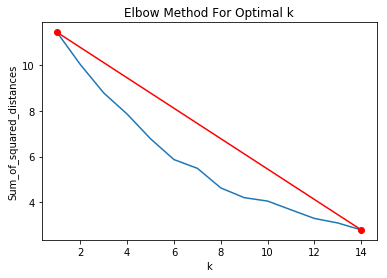

In [111]:
Sum_of_squared_distances = []
mumbai_grouped_clustering = mumbai_grouped.drop('Neighborhood', 1)
K = range(1,15)
for k in K:
    km = KMeans(n_clusters=k)
    km = km.fit(mumbai_grouped_clustering)
    Sum_of_squared_distances.append(km.inertia_)

x=[1,2,3,4,5,6,7,8,9,10,11,12,13,14]
import matplotlib.pyplot as plt
plt.plot(x, Sum_of_squared_distances)
plt.plot([K[0], K[13]],[Sum_of_squared_distances[0],Sum_of_squared_distances[13]],'ro-')
plt.xlabel('k')
plt.ylabel('Sum_of_squared_distances')
plt.title('Elbow Method For Optimal k')
plt.show()

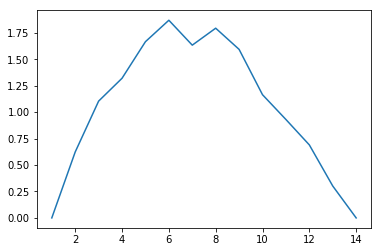

In [112]:
def calc_distance(x1,y1,a,b,c):
    d = abs((a * x1 + b * y1 + c)) / (math.sqrt(a * a + b * b))
    return d
a = Sum_of_squared_distances[0] - Sum_of_squared_distances[13]
b = K[13] - K[0]
c1 = K[0] * Sum_of_squared_distances[13]
c2 = K[13] * Sum_of_squared_distances[0]
c = c1 - c2

import math
distance_of_points_from_line = []
for k in range(14):
    distance_of_points_from_line.append(
        calc_distance(K[k],Sum_of_squared_distances[k],a,b,c))

distance_of_points_from_line
plt.plot(K,distance_of_points_from_line)    

#### Thats settled. k = 6

In [113]:
from sklearn.cluster import KMeans
# set number of clusters
kclusters = 6

mumbai_grouped_clustering = mumbai_grouped.drop('Neighborhood', 1)

# run k-means clustering
kmeans = KMeans(n_clusters=kclusters, random_state=0).fit(mumbai_grouped_clustering)

# check cluster labels generated for each row in the dataframe
kmeans.labels_[0:10] 

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0], dtype=int32)

In [114]:
# add clustering labels
neighborhoods_venues_sorted.insert(0, 'Cluster Labels', kmeans.labels_)

mumbai_merged = thane_navi_mumbai_data

# merge toronto_grouped with toronto_data to add latitude/longitude for each neighborhood
mumbai_merged = mumbai_merged.join(neighborhoods_venues_sorted.set_index('Neighborhood'), on='Neighborhood')

mumbai_merged.head() # check the last columns!

,City,Neighborhood,zip_code,Latitude,Longitude,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
94,Navi Mumbai,Airoli Mode,400708,19.176243,73.003531,0.0,Dessert Shop,Restaurant,Indian Restaurant,Moving Target,Flea Market,Coffee Shop,Chinese Restaurant,Sandwich Place,Bus Station,Burger Joint
96,Navi Mumbai,Ghansoli,400701,19.131424,73.000537,0.0,Fast Food Restaurant,Pizza Place,Hotel,Café,Bus Station,Indian Restaurant,Food Truck,Diner,Dumpling Restaurant,Coffee Shop
98,Navi Mumbai,Konkan Bhawan,400614,46.780601,23.612298,0.0,Bakery,Coffee Shop,Café,Plaza,Restaurant,Gym / Fitness Center,Eastern European Restaurant,Hotel,Bookstore,Park
99,Navi Mumbai,Krishi Utpanna Bazar,400705,19.080266,73.021173,0.0,Fast Food Restaurant,Department Store,Coffee Shop,Indian Restaurant,Restaurant,Hotel,Snack Place,Ice Cream Shop,Bookstore,Nightclub
100,Navi Mumbai,Mumbra,400612,46.779054,23.616420,0.0,Bakery,Coffee Shop,Café,Hotel,Plaza,Restaurant,Bookstore,Park,Gym / Fitness Center,Eastern European Restaurant


In [115]:
mumbai_merged=mumbai_merged.dropna()
mumbai_merged['Cluster Labels']=mumbai_merged['Cluster Labels'].astype(int)

In [116]:
# create map
map_clusters = folium.Map(location=[latitude, longitude], zoom_start=9)

# set color scheme for the clusters
x = np.arange(kclusters)
ys = [i + x + (i*x)**2 for i in range(kclusters)]
colors_array = cm.rainbow(np.linspace(0, 1, len(ys)))
rainbow = [colors.rgb2hex(i) for i in colors_array]

# add markers to the map
markers_colors = []
for lat, lon, poi, cluster in zip(mumbai_merged['Latitude'], mumbai_merged['Longitude'], mumbai_merged['Neighborhood'], mumbai_merged['Cluster Labels']):
    label = folium.Popup(str(poi) + ' Cluster ' + str(cluster), parse_html=True)
    folium.CircleMarker(
        [lat, lon],
        radius=5,
        popup=label,
        color=rainbow[cluster-1],
        fill=True,
        fill_color=rainbow[cluster-1],
        fill_opacity=0.7).add_to(map_clusters)
       
map_clusters

In [197]:
mumbai_merged

,City,Neighborhood,zip_code,Latitude,Longitude,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
94,Navi Mumbai,Airoli Mode,400708,19.176243,73.003531,0,Indian Restaurant,Gym,Food Court,Snack Place,Smoke Shop,Sandwich Place,Restaurant,Fast Food Restaurant,Vegetarian / Vegan Restaurant,Platform
96,Navi Mumbai,Ghansoli,400701,19.131424,73.000537,0,Gym / Fitness Center,Fast Food Restaurant,Indian Restaurant,Smoke Shop,Hotel,Juice Bar,Food Court,Flea Market,Pizza Place,Department Store
98,Navi Mumbai,Konkan Bhawan,400614,46.780601,23.612298,0,Coffee Shop,Bakery,Gym / Fitness Center,Gym,Restaurant,Pizza Place,Clothing Store,Hotel,Fast Food Restaurant,Dessert Shop
99,Navi Mumbai,Krishi Utpanna Bazar,400705,19.080266,73.021173,0,Hotel,Indian Restaurant,Ice Cream Shop,Restaurant,Italian Restaurant,Train Station,Snack Place,Beer Garden,Dessert Shop,Electronics Store
100,Navi Mumbai,Mumbra,400612,46.779054,23.616420,0,Coffee Shop,Gym / Fitness Center,Bakery,Clothing Store,Gym,Pizza Place,Café,Hotel,Restaurant,Fast Food Restaurant
101,Navi Mumbai,N A D Karanja,400704,29.846600,106.472145,2,Train Station,Women's Store,English Restaurant,Food & Drink Shop,Flower Shop,Flea Market,Fish Market,Fast Food Restaurant,Farmers Market,Event Space
102,Navi Mumbai,Nerul Mode,400706,19.012233,73.015246,0,Indian Restaurant,Café,Italian Restaurant,Chinese Restaurant,Restaurant,Sandwich Place,Lounge,Pizza Place,Gym,Seafood Restaurant
103,Navi Mumbai,Turbhe,400613,46.781382,23.608964,0,Gym / Fitness Center,Bakery,Coffee Shop,Restaurant,Gym,Wine Bar,Cocktail Bar,Hotel,Fast Food Restaurant,Plaza
104,Navi Mumbai,Uran,400702,18.882280,72.949381,0,Indian Restaurant,ATM,Ice Cream Shop,Market,Bus Station,English Restaurant,Flower Shop,Flea Market,Fish Market,Fast Food Restaurant
105,Navi Mumbai,Vashi,400703,19.082812,72.996086,0,Indian Restaurant,Hotel,Coffee Shop,Pizza Place,Seafood Restaurant,Chinese Restaurant,Department Store,Bar,Fast Food Restaurant,Bookstore


#### This concludes exploring.

#### Let's see some observations and implications

##### Cluster 0 seems to be popular.

In [117]:
mumbai_merged.loc[mumbai_merged['Cluster Labels'] == 0, mumbai_merged.columns[[1] + list(range(5, mumbai_merged.shape[1]))]]

,Neighborhood,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
94,Airoli Mode,0,Dessert Shop,Restaurant,Indian Restaurant,Moving Target,Flea Market,Coffee Shop,Chinese Restaurant,Sandwich Place,Bus Station,Burger Joint
96,Ghansoli,0,Fast Food Restaurant,Pizza Place,Hotel,Café,Bus Station,Indian Restaurant,Food Truck,Diner,Dumpling Restaurant,Coffee Shop
98,Konkan Bhawan,0,Bakery,Coffee Shop,Café,Plaza,Restaurant,Gym / Fitness Center,Eastern European Restaurant,Hotel,Bookstore,Park
99,Krishi Utpanna Bazar,0,Fast Food Restaurant,Department Store,Coffee Shop,Indian Restaurant,Restaurant,Hotel,Snack Place,Ice Cream Shop,Bookstore,Nightclub
100,Mumbra,0,Bakery,Coffee Shop,Café,Hotel,Plaza,Restaurant,Bookstore,Park,Gym / Fitness Center,Eastern European Restaurant
102,Nerul Mode,0,Indian Restaurant,Café,Fast Food Restaurant,Chinese Restaurant,Bakery,Coffee Shop,Restaurant,Sandwich Place,Train Station,Gym
103,Turbhe,0,Bakery,Coffee Shop,Café,Plaza,Restaurant,Bookstore,Gym / Fitness Center,Hotel,Park,Department Store
104,Uran,0,Indian Restaurant,ATM,Market,Ice Cream Shop,Bus Station,Shopping Mall,Flower Shop,Flea Market,Fish Market,Fast Food Restaurant
105,Vashi,0,Indian Restaurant,Fast Food Restaurant,Pizza Place,Coffee Shop,Hotel,Department Store,Café,Chinese Restaurant,Bookstore,Ice Cream Shop
106,Agashi,0,Indian Restaurant,Diner,Motel,Fast Food Restaurant,Wine Bar,Farm,Food & Drink Shop,Food,Flower Shop,Flea Market


-----------------------------------------------------------------------------------------------------------------------------------------------------------------

If we zoom out we can see some data points on the map have got plotted in some other country. 
This is because when we go back to dataset and check closely we see the latitude and longitude are not correct.
Next iteration of this task should be to clean up the dataset with updated latitude and longitude values or we should drop those data points.

I would leave that task for another day

-----------------------------------------------------------------------------------------------------------------------------------------------------------------

-----------------------------------------------------------------------------------------------------------------------------------------------------------------

## Remarks <a name="Remarks"></a>

Based on my observation I can see cluster 0 has mostly common places like restaurant, bakery gym, cafe, Parks, multiplex. These places are common.
In India these places are close to residential areas and within residential areas too since the population density is more. 
So if I need to move to Mumbai from bangalore my starting point to check residences would be to consider cluster 0 and explore again in detail.
Depending on work location and commuting time I would further elimiate some of these or consider some of these.

Data Science helps!

There is one more idea I want to explore. Based on above clustering of mumbai location data I could find out cluster that has large number of data points that is cluster 0. This gives me a list of areas for short listing.
I will now combine the two datasets that is bangalore location data and Mumbai location data and then do clustering together. The areas that are in same cluster as the cluster I live in are most similar to my area.
This data will again help to choose which areas are most similar and we can use it to narrow down the results further.
Lets go.

In [118]:
frames=[bangalore_venues,mumbai_venues ]
all_venues=pd.concat(frames)
all_venues.shape

(3460, 7)

In [119]:
# one hot encoding
all_onehot = pd.get_dummies(all_venues[['Venue Category']], prefix="", prefix_sep="")

# add neighborhood column back to dataframe
all_onehot['Neighborhood'] = all_venues['Neighborhood'] 

# move neighborhood column to the first column
fixed_columns = [all_onehot.columns[-1]] + list(all_onehot.columns[:-1])
all_onehot = all_onehot[fixed_columns]

all_onehot.head()

,Yoga Studio,ATM,Afghan Restaurant,Airport,Airport Lounge,Airport Terminal,American Restaurant,Andhra Restaurant,Arcade,Art Gallery,...,Trail,Train Station,Tram Station,Turkish Restaurant,Vegetarian / Vegan Restaurant,Vietnamese Restaurant,Water Park,Whisky Bar,Wine Bar,Women's Store
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [120]:
all_grouped = all_onehot.groupby('Neighborhood').mean().reset_index()
all_grouped

,Neighborhood,Yoga Studio,ATM,Afghan Restaurant,Airport,Airport Lounge,Airport Terminal,American Restaurant,Andhra Restaurant,Arcade,...,Trail,Train Station,Tram Station,Turkish Restaurant,Vegetarian / Vegan Restaurant,Vietnamese Restaurant,Water Park,Whisky Bar,Wine Bar,Women's Store
0,Adugodi,0.01,0.000000,0.00,0.000000,0.000000,0.000000,0.000000,0.00,0.010000,...,0.00,0.000000,0.000000,0.000000,0.010000,0.00,0.000000,0.00,0.000000,0.00
1,Agaram,0.00,0.000000,0.00,0.000000,0.000000,0.000000,0.000000,0.01,0.010000,...,0.00,0.000000,0.000000,0.000000,0.000000,0.01,0.000000,0.00,0.000000,0.00
2,Agashi,0.00,0.000000,0.00,0.000000,0.000000,0.000000,0.000000,0.00,0.000000,...,0.00,0.000000,0.000000,0.000000,0.000000,0.00,0.000000,0.00,0.000000,0.00
3,Airoli Mode,0.00,0.000000,0.00,0.000000,0.000000,0.000000,0.000000,0.00,0.000000,...,0.00,0.050000,0.000000,0.000000,0.050000,0.00,0.000000,0.00,0.000000,0.00
4,Arnala,0.00,0.000000,0.00,0.000000,0.000000,0.000000,0.000000,0.00,0.000000,...,0.00,0.000000,0.000000,0.000000,0.020000,0.00,0.010000,0.00,0.000000,0.00
5,Balcum,0.00,0.000000,0.00,0.000000,0.000000,0.000000,0.000000,0.00,0.000000,...,0.00,0.012346,0.000000,0.000000,0.012346,0.00,0.000000,0.00,0.000000,0.00
6,Banashankari,0.00,0.000000,0.00,0.000000,0.000000,0.000000,0.000000,0.00,0.011111,...,0.00,0.000000,0.000000,0.000000,0.011111,0.00,0.000000,0.00,0.000000,0.00
7,Banashankari 2nd Stage,0.00,0.000000,0.00,0.000000,0.000000,0.000000,0.000000,0.01,0.000000,...,0.00,0.000000,0.000000,0.000000,0.000000,0.00,0.000000,0.00,0.000000,0.01
8,Banashankari 3rd Stage,0.00,0.000000,0.00,0.000000,0.000000,0.000000,0.000000,0.00,0.018182,...,0.00,0.000000,0.000000,0.000000,0.000000,0.00,0.000000,0.00,0.000000,0.00
9,Bannerghatta,0.00,0.000000,0.00,0.000000,0.000000,0.000000,0.010000,0.00,0.000000,...,0.00,0.000000,0.000000,0.000000,0.010000,0.00,0.000000,0.00,0.000000,0.00


In [121]:
num_top_venues = 5

for hood in all_grouped['Neighborhood']:
    print("----"+hood+"----")
    temp = all_grouped[all_grouped['Neighborhood'] == hood].T.reset_index()
    temp.columns = ['venue','freq']
    temp = temp.iloc[1:]
    temp['freq'] = temp['freq'].astype(float)
    temp = temp.round({'freq': 2})
    print(temp.sort_values('freq', ascending=False).reset_index(drop=True).head(num_top_venues))
    print('\n')

----Adugodi----
               venue  freq
0  Indian Restaurant  0.15
1               Café  0.05
2                Gym  0.04
3     Ice Cream Shop  0.04
4             Lounge  0.04


----Agaram----
               venue  freq
0               Café  0.07
1  Indian Restaurant  0.06
2     Ice Cream Shop  0.06
3              Hotel  0.05
4                Pub  0.05


----Agashi----
                  venue  freq
0     Indian Restaurant  0.50
1                 Diner  0.25
2                 Motel  0.12
3  Fast Food Restaurant  0.12
4           Opera House  0.00


----Airoli Mode----
               venue  freq
0  Indian Restaurant  0.10
1       Dessert Shop  0.10
2         Restaurant  0.10
3        Coffee Shop  0.05
4      Moving Target  0.05


----Arnala----
                  venue  freq
0     Indian Restaurant  0.15
1           Coffee Shop  0.08
2  Fast Food Restaurant  0.06
3           Pizza Place  0.06
4         Shopping Mall  0.04


----Balcum----
                  venue  freq
0     Indian Resta

In [122]:
def return_most_common_venues(row, num_top_venues):
    row_categories = row.iloc[1:]
    row_categories_sorted = row_categories.sort_values(ascending=False)
    
    return row_categories_sorted.index.values[0:num_top_venues]

In [123]:
num_top_venues = 10

indicators = ['st', 'nd', 'rd']

# create columns according to number of top venues
columns = ['Neighborhood']
for ind in np.arange(num_top_venues):
    try:
        columns.append('{}{} Most Common Venue'.format(ind+1, indicators[ind]))
    except:
        columns.append('{}th Most Common Venue'.format(ind+1))

# create a new dataframe
neighborhoods_venues_sorted = pd.DataFrame(columns=columns)
neighborhoods_venues_sorted['Neighborhood'] = all_grouped['Neighborhood']

for ind in np.arange(all_grouped.shape[0]):
    neighborhoods_venues_sorted.iloc[ind, 1:] = return_most_common_venues(all_grouped.iloc[ind, :], num_top_venues)

neighborhoods_venues_sorted.head(16)

,Neighborhood,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,Adugodi,Indian Restaurant,Café,Gym,Ice Cream Shop,Lounge,Dessert Shop,Juice Bar,Hotel,Bakery,Fast Food Restaurant
1,Agaram,Café,Ice Cream Shop,Indian Restaurant,Pub,Hotel,Clothing Store,Brewery,Tea Room,Asian Restaurant,Burger Joint
2,Agashi,Indian Restaurant,Diner,Motel,Fast Food Restaurant,Women's Store,Electronics Store,Flower Shop,Flea Market,Fish Market,Financial or Legal Service
3,Airoli Mode,Indian Restaurant,Restaurant,Dessert Shop,Flea Market,Fast Food Restaurant,Sandwich Place,Moving Target,Burger Joint,Bus Station,Smoke Shop
4,Arnala,Indian Restaurant,Coffee Shop,Fast Food Restaurant,Pizza Place,Shopping Mall,Lounge,Pub,Clothing Store,Multiplex,Seafood Restaurant
5,Balcum,Indian Restaurant,Pizza Place,Fast Food Restaurant,Coffee Shop,Dessert Shop,Shopping Mall,Multiplex,Clothing Store,Lounge,Hotel
6,Banashankari,Indian Restaurant,Fast Food Restaurant,Café,Ice Cream Shop,Breakfast Spot,Coffee Shop,Park,Bakery,Pizza Place,Snack Place
7,Banashankari 2nd Stage,Indian Restaurant,Ice Cream Shop,Café,Fast Food Restaurant,Breakfast Spot,Snack Place,Juice Bar,Chinese Restaurant,Restaurant,Coffee Shop
8,Banashankari 3rd Stage,Café,Pizza Place,Indian Restaurant,Breakfast Spot,Fast Food Restaurant,Ice Cream Shop,Sandwich Place,Snack Place,Coffee Shop,Indian Chinese Restaurant
9,Bannerghatta,Indian Restaurant,Pizza Place,Café,Chinese Restaurant,Ice Cream Shop,Fast Food Restaurant,South Indian Restaurant,Department Store,Coffee Shop,Brewery


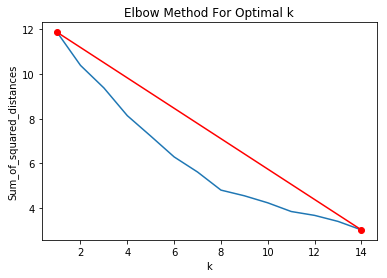

In [124]:
Sum_of_squared_distances = []
all_grouped_clustering = all_grouped.drop('Neighborhood', 1)
K = range(1,15)
for k in K:
    km = KMeans(n_clusters=k)
    km = km.fit(all_grouped_clustering)
    Sum_of_squared_distances.append(km.inertia_)

x=[1,2,3,4,5,6,7,8,9,10,11,12,13,14]
import matplotlib.pyplot as plt
plt.plot(x, Sum_of_squared_distances)
plt.plot([K[0], K[13]],[Sum_of_squared_distances[0],Sum_of_squared_distances[13]],'ro-')
plt.xlabel('k')
plt.ylabel('Sum_of_squared_distances')
plt.title('Elbow Method For Optimal k')
plt.show()

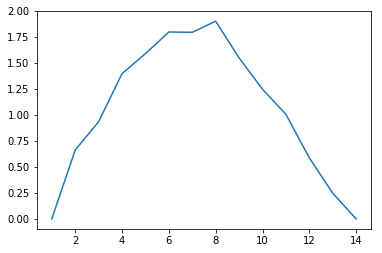

In [125]:
def calc_distance(x1,y1,a,b,c):
    d = abs((a * x1 + b * y1 + c)) / (math.sqrt(a * a + b * b))
    return d
a = Sum_of_squared_distances[0] - Sum_of_squared_distances[13]
b = K[13] - K[0]
c1 = K[0] * Sum_of_squared_distances[13]
c2 = K[13] * Sum_of_squared_distances[0]
c = c1 - c2

import math
distance_of_points_from_line = []
for k in range(14):
    distance_of_points_from_line.append(
        calc_distance(K[k],Sum_of_squared_distances[k],a,b,c))

distance_of_points_from_line
plt.plot(K,distance_of_points_from_line)    

In [126]:
from sklearn.cluster import KMeans
# set number of clusters
kclusters = 8

all_grouped_clustering = all_grouped.drop('Neighborhood', 1)

# run k-means clustering
kmeans = KMeans(n_clusters=kclusters, random_state=0).fit(all_grouped_clustering)

# check cluster labels generated for each row in the dataframe
kmeans.labels_[0:10] 

array([0, 4, 0, 4, 0, 0, 0, 0, 0, 0], dtype=int32)

In [128]:
bangalore_south_data['City']='Bangalore'
frames = [bangalore_south_data, thane_navi_mumbai_data]
all_data=pd.concat(frames)

/opt/conda/envs/Python36/lib/python3.6/site-packages/ipykernel/__main__.py:3: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  app.launch_new_instance()


In [129]:
all_data.head()

,City,Latitude,Longitude,Neighborhood,zip_code
0,Bangalore,12.941853,77.602391,Adugodi,560030
1,Bangalore,12.965130,77.629283,Agaram,560007
2,Bangalore,12.941995,77.553220,Banashankari,560050
3,Bangalore,12.922968,77.564405,Banashankari 2nd Stage,560070
4,Bangalore,12.937930,77.541669,Banashankari 3rd Stage,560085


In [130]:
# add clustering labels
neighborhoods_venues_sorted.insert(0, 'Cluster Labels', kmeans.labels_)

all_merged = all_data

# merge toronto_grouped with toronto_data to add latitude/longitude for each neighborhood
all_merged = all_merged.join(neighborhoods_venues_sorted.set_index('Neighborhood'), on='Neighborhood')

all_merged.head() # check the last columns!

,City,Latitude,Longitude,Neighborhood,zip_code,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,Bangalore,12.941853,77.602391,Adugodi,560030,0.0,Indian Restaurant,Café,Gym,Ice Cream Shop,Lounge,Dessert Shop,Juice Bar,Hotel,Bakery,Fast Food Restaurant
1,Bangalore,12.965130,77.629283,Agaram,560007,4.0,Café,Ice Cream Shop,Indian Restaurant,Pub,Hotel,Clothing Store,Brewery,Tea Room,Asian Restaurant,Burger Joint
2,Bangalore,12.941995,77.553220,Banashankari,560050,0.0,Indian Restaurant,Fast Food Restaurant,Café,Ice Cream Shop,Breakfast Spot,Coffee Shop,Park,Bakery,Pizza Place,Snack Place
3,Bangalore,12.922968,77.564405,Banashankari 2nd Stage,560070,0.0,Indian Restaurant,Ice Cream Shop,Café,Fast Food Restaurant,Breakfast Spot,Snack Place,Juice Bar,Chinese Restaurant,Restaurant,Coffee Shop
4,Bangalore,12.937930,77.541669,Banashankari 3rd Stage,560085,0.0,Café,Pizza Place,Indian Restaurant,Breakfast Spot,Fast Food Restaurant,Ice Cream Shop,Sandwich Place,Snack Place,Coffee Shop,Indian Chinese Restaurant


In [131]:
all_merged=all_merged.dropna()
all_merged['Cluster Labels']=all_merged['Cluster Labels'].astype(int)

In [132]:
# create map
map_clusters = folium.Map(location=[latitude, longitude], zoom_start=9)

# set color scheme for the clusters
x = np.arange(kclusters)
ys = [i + x + (i*x)**2 for i in range(kclusters)]
colors_array = cm.rainbow(np.linspace(0, 1, len(ys)))
rainbow = [colors.rgb2hex(i) for i in colors_array]

# add markers to the map
markers_colors = []
for lat, lon, poi, cluster in zip(all_merged['Latitude'], all_merged['Longitude'], all_merged['Neighborhood'], all_merged['Cluster Labels']):
    label = folium.Popup(str(poi) + ' Cluster ' + str(cluster), parse_html=True)
    folium.CircleMarker(
        [lat, lon],
        radius=5,
        popup=label,
        color=rainbow[cluster-1],
        fill=True,
        fill_color=rainbow[cluster-1],
        fill_opacity=0.7).add_to(map_clusters)
       
map_clusters

#### I stay in cluster 0 . Lets see the locations for cluster 0

In [135]:
all_merged.loc[all_merged['Cluster Labels'] == 0, all_merged.columns[[0] + list(range(3, all_merged.shape[1]))]]
#all_merged.loc[all_merged['Cluster Labels'] == 1, all_merged.columns[[0] + list(range(3, all_merged.shape[1]))]]
#all_merged.loc[all_merged['Cluster Labels'] == 2, all_merged.columns[[0] + list(range(5, all_merged.shape[1]))]]
#all_merged.loc[all_merged['Cluster Labels'] == 3, all_merged.columns[[1] + list(range(5, all_merged.shape[1]))]]
#all_merged.loc[all_merged['Cluster Labels'] == 4, all_merged.columns[[1] + list(range(5, all_merged.shape[1]))]]

,City,Neighborhood,zip_code,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,Bangalore,Adugodi,560030,0,Indian Restaurant,Café,Gym,Ice Cream Shop,Lounge,Dessert Shop,Juice Bar,Hotel,Bakery,Fast Food Restaurant
2,Bangalore,Banashankari,560050,0,Indian Restaurant,Fast Food Restaurant,Café,Ice Cream Shop,Breakfast Spot,Coffee Shop,Park,Bakery,Pizza Place,Snack Place
3,Bangalore,Banashankari 2nd Stage,560070,0,Indian Restaurant,Ice Cream Shop,Café,Fast Food Restaurant,Breakfast Spot,Snack Place,Juice Bar,Chinese Restaurant,Restaurant,Coffee Shop
4,Bangalore,Banashankari 3rd Stage,560085,0,Café,Pizza Place,Indian Restaurant,Breakfast Spot,Fast Food Restaurant,Ice Cream Shop,Sandwich Place,Snack Place,Coffee Shop,Indian Chinese Restaurant
5,Bangalore,Bannerghatta,560083,0,Indian Restaurant,Pizza Place,Café,Chinese Restaurant,Ice Cream Shop,Fast Food Restaurant,South Indian Restaurant,Department Store,Coffee Shop,Brewery
6,Bangalore,Bannerghatta Road,560076,0,Indian Restaurant,Ice Cream Shop,Café,Chinese Restaurant,Multiplex,Brewery,Coffee Shop,Bakery,Sandwich Place,Fast Food Restaurant
7,Bangalore,Basavangudi,560004,0,Indian Restaurant,Ice Cream Shop,Fast Food Restaurant,Restaurant,Juice Bar,Park,Sandwich Place,South Indian Restaurant,Bakery,Snack Place
8,Bangalore,Dharmaram College,560029,0,Indian Restaurant,Ice Cream Shop,Chinese Restaurant,Coffee Shop,Bakery,Café,Multiplex,Restaurant,Brewery,Lounge
9,Bangalore,Jayanagar East,560069,0,Indian Restaurant,Ice Cream Shop,Coffee Shop,Café,Bakery,Chinese Restaurant,Brewery,Gym,Multiplex,Juice Bar
10,Bangalore,Jayanagar South,560041,0,Indian Restaurant,Ice Cream Shop,Café,Coffee Shop,Chinese Restaurant,Fast Food Restaurant,Bakery,Brewery,Restaurant,Multiplex


In [138]:
mumbai_similar_cluster_data=all_merged[all_merged['Cluster Labels']==0]
mumbai_similar_cluster_data=mumbai_similar_cluster_data[mumbai_similar_cluster_data['City'].isin(['Navi Mumbai','Thane'])]

In [139]:
mumbai_similar_cluster_data['Neighborhood'].unique()

array(['Ghansoli', 'Nerul Mode', 'Uran', 'Vashi', 'Agashi', 'Arnala',
       'Balcum', 'Bassien Road', 'Bhayandar', 'Bhayander (East)', 'Kasa',
       'Kelwa Mahim', 'Mira', 'Mira Road', 'Nalasopara (East)', 'Papdi',
       'Sopara', 'Tarapur App'], dtype=object)

1. Ghansoli 
2. Nerul Mode 
3. Uran 
4. Vashi 
5. Agashi 
6. Arnala
7. Balcum 
8. Bassien Road 
9. Bhayandar 
10. Bhayander (East) 
11. Kasa
12. Kelwa Mahim 
13. Mira 
14. Mira Road 
15. Nalasopara (East) 
16. Papdi
17. Sopara 
18. Tarapur App

## Results and Discussion <a name="results"></a>
So we have got 18 Places with same cluster as the one I am staying in Bangalore.

## Conclusion <a name="conclusion"></a>

Based on the above clustering of bangalore and mumbai data together I could figure out what areas in Mumbai are most similar to the area I live in. This helps me to get started with list of places where I can move if I were to move to Mumbai. This can be further used to find out in detail the venues I like and what radius they should be in like a tennis court could be within 1 mile and then a super market fall within 1 mile. We could use such criteria to further find out lat lng that satisfy such conditions.

Thank you